In [1]:
import numpy as np
from astropy.io import fits
from pathlib import Path

imlist = []
jd = []
for i in range(1237):
    fn = Path(Path.cwd()) / f"data/TESS/HAT-P-11/{i}.fits"
    imlist.append(fits.getdata(fn))
    jd.append(fits.getheader(fn)["btjd"])

imlist = np.array(imlist)
jd = np.array(jd)

In [2]:
jd

array([1683.36712646, 1683.38800049, 1683.40881348, ..., 1710.13824463,
       1710.15905762, 1710.17987061])

In [3]:
jd.shape

(1237,)

In [4]:
imlist.shape

(1237, 20, 20)

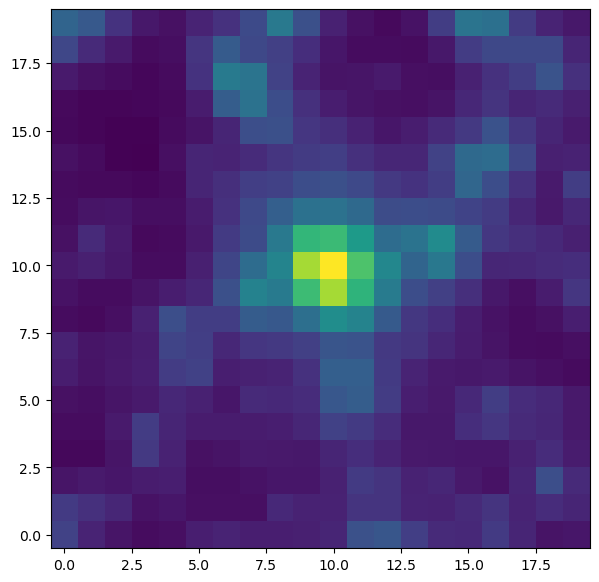

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.log10(imlist[0]), origin="lower")

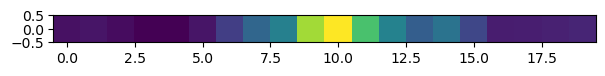

In [6]:
fig, ax = plt.subplots(figsize=(7, 1))
pixels = np.log10(imlist[0])[10]
ax.imshow(np.array([pixels]), origin="lower")

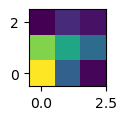

In [7]:
# Exercise 6.1.1
fig, ax = plt.subplots(figsize=(1, 1))
images = np.log10(imlist[2:10])
# First image, first 3 rows and cols
ax.imshow(images[0, 0:3, 0:3], origin="lower")

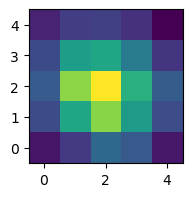

In [8]:
# Exercise 6.1.2
fig, ax = plt.subplots(figsize=(2, 2))
images = np.log10(imlist[1::2])
# First image, central 5 pixels
ax.imshow(images[0, 8:13, 8:13], origin="lower")

In [9]:
cropped_array = imlist[:, 8:13, 8:13]
np.sum(cropped_array, axis=0).shape

(5, 5)

In [10]:
flux = np.sum(cropped_array, axis=(1, 2))
flux.shape

(1237,)

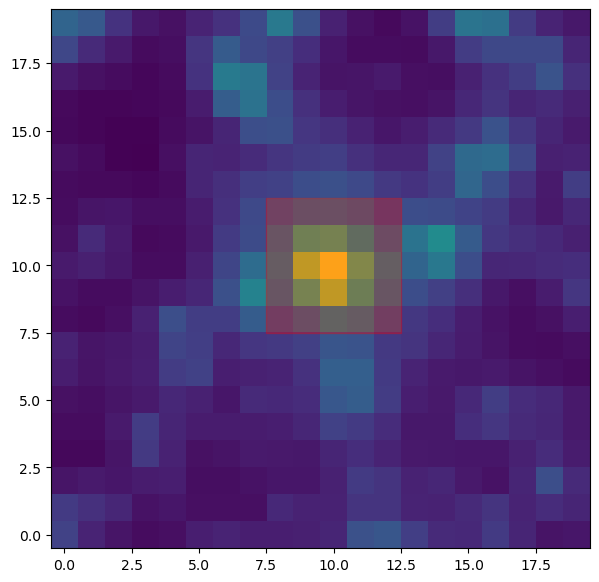

In [11]:
bg = imlist[:, 8:13, 8:13]
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.log10(imlist[0]), origin="lower")
ax.fill_between([7.5, 12.5], 7.5, 12.5, color="r", alpha=0.3)

Text(0, 0.5, 'Flux')

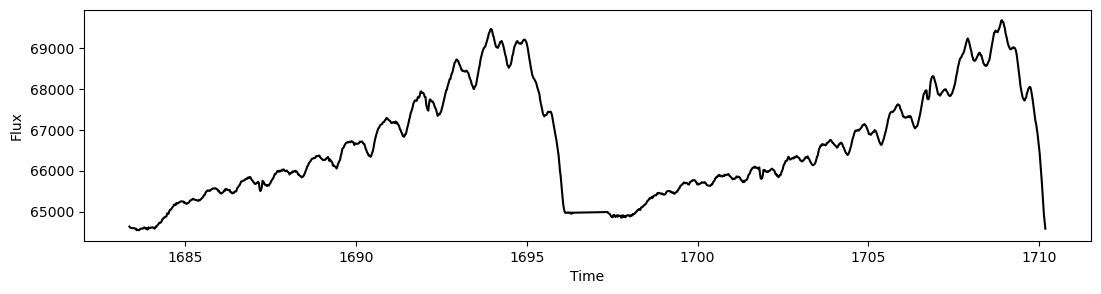

In [12]:
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(jd, flux, "k")
ax.set_xlabel("Time")
ax.set_ylabel("Flux")

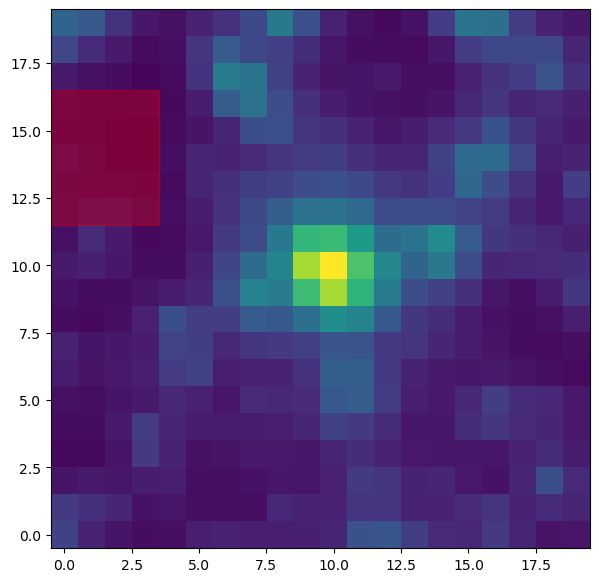

In [13]:
bg = imlist[:, 0:4, 12:17]
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.log10(imlist[0]), origin="lower")
ax.fill_between([-0.5, 3.5], 11.5, 16.5, color="r", alpha=0.3)

Text(0, 0.5, 'Flux (background)')

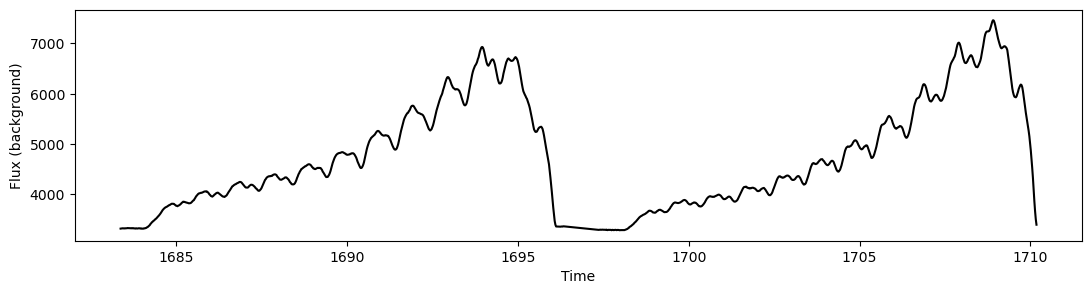

In [14]:
flux_bg = np.sum(bg, axis=(1, 2))
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(jd, flux_bg, "k")
ax.set_xlabel("Time")
ax.set_ylabel("Flux (background)")

In [15]:
mean_bg = np.mean(bg, axis=(1, 2))
mean_bg.shape

(1237,)

In [16]:
cropped_array[0].size

25

Text(0, 0.5, 'Flux (background subtracted)')

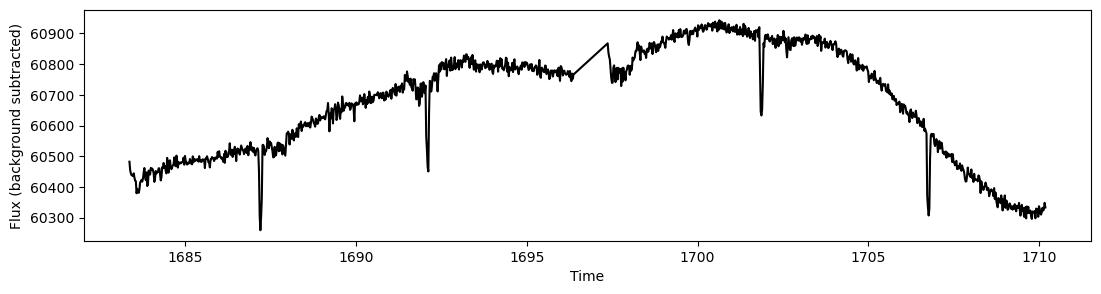

In [17]:
flux_minus_bg = flux - mean_bg * cropped_array[0].size
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(jd, flux_minus_bg, "-", color="k")
ax.set_xlabel("Time")
ax.set_ylabel("Flux (background subtracted)")

Text(0, 0.5, 'Flux (background subtracted)')

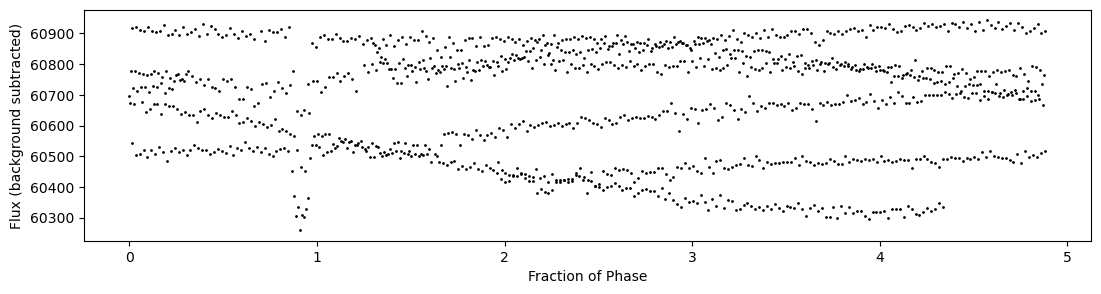

In [18]:
period_days = 4.887802443
folded_time = jd % period_days
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(folded_time, flux_minus_bg, ".", color="k", ms=2)
ax.set_xlabel("Fraction of Phase")
ax.set_ylabel("Flux (background subtracted)")

Text(0, 0.5, 'Folded Time')

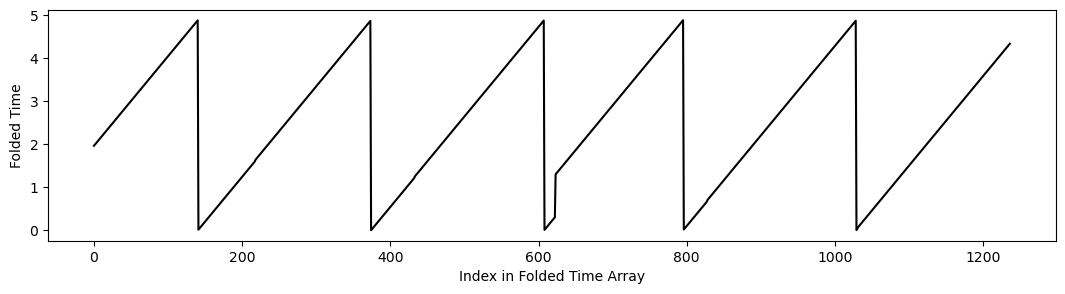

In [19]:
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(folded_time, color="k")
ax.set_xlabel("Index in Folded Time Array")
ax.set_ylabel("Folded Time")

Text(0, 0.5, 'Difference from element to element')

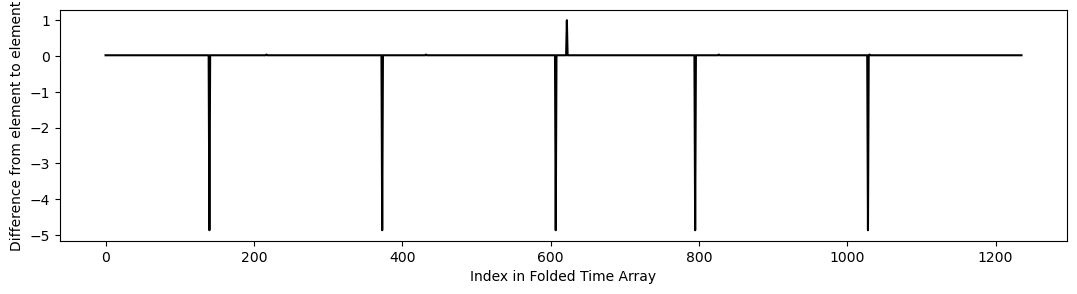

In [20]:
difference_array = folded_time[1:] - folded_time[:-1]
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(difference_array, color="k")
ax.set_xlabel("Index in Folded Time Array")
ax.set_ylabel("Difference from element to element")

In [21]:
(ind,) = np.where(difference_array < 0)
ind

array([ 140,  373,  607,  795, 1028])

In [22]:
folded_time[140]

np.float64(4.879834119718751)

In [23]:
folded_time[141]

np.float64(0.012844665000001143)

In [24]:
composite_array = np.array([folded_time, flux_minus_bg])
composite_array.shape

(2, 1237)

Text(0, 0.5, 'Flux')

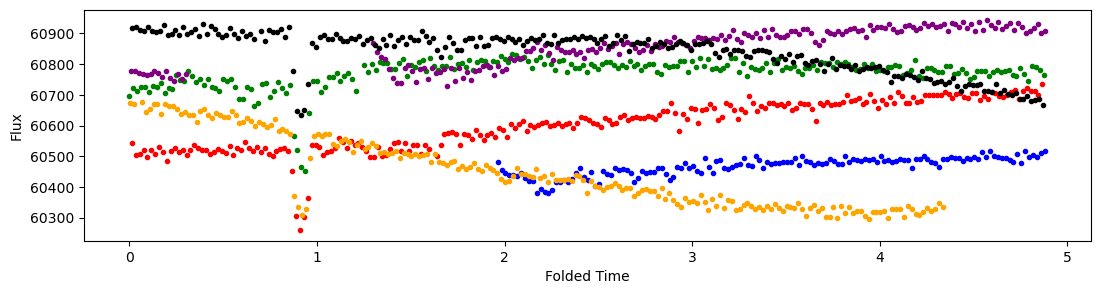

In [25]:
chunk1 = composite_array[:, :141]
chunk2 = composite_array[:, 141:374]
chunk3 = composite_array[:, 374:608]
chunk4 = composite_array[:, 608:796]
chunk5 = composite_array[:, 796:1029]
chunk6 = composite_array[:, 1029:]

fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(chunk1[0], chunk1[1], ".", color="blue")
ax.plot(chunk2[0], chunk2[1], ".", color="red")
ax.plot(chunk3[0], chunk3[1], ".", color="green")
ax.plot(chunk4[0], chunk4[1], ".", color="purple")
ax.plot(chunk5[0], chunk5[1], ".", color="black")
ax.plot(chunk6[0], chunk6[1], ".", color="orange")
ax.set_xlabel("Folded Time")
ax.set_ylabel("Flux")

Text(0, 0.5, 'Flux')

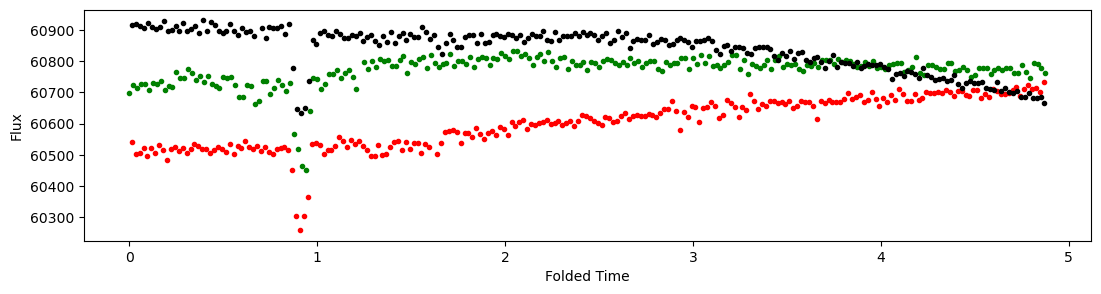

In [26]:
fig, ax = plt.subplots(figsize=(13, 3))
ax.plot(chunk2[0], chunk2[1], ".", color="red")
ax.plot(chunk3[0], chunk3[1], ".", color="green")
ax.plot(chunk5[0], chunk5[1], ".", color="black")
# ax.plot(chunk6[0], chunk6[1], ".", color="orange")
ax.set_xlabel("Folded Time")
ax.set_ylabel("Flux")

(0.6, 1.2)

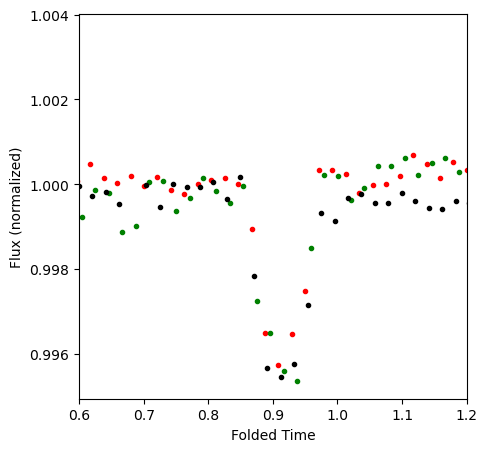

In [27]:
chunk2_norm = chunk2[1] / np.mean(chunk2[1, :20])
chunk3_norm = chunk3[1] / np.mean(chunk3[1, :20])
chunk5_norm = chunk5[1] / np.mean(chunk5[1, :20])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(chunk2[0], chunk2_norm, ".", color="red")
ax.plot(chunk3[0], chunk3_norm, ".", color="green")
ax.plot(chunk5[0], chunk5_norm, ".", color="black")
ax.set_xlabel("Folded Time")
ax.set_ylabel("Flux (normalized)")
ax.set_xlim(0.6, 1.2)

In [28]:
final_transit_fluxes = np.concatenate([chunk2_norm, chunk3_norm, chunk5_norm])
final_transit_times = np.concatenate([chunk2[0], chunk3[0], chunk5[0]])
final_transit = np.array([final_transit_times, final_transit_fluxes]).T

In [29]:
final_transit_fluxes.shape

(700,)

In [30]:
final_transit_times.shape

(700,)

In [31]:
final_transit.shape

(700, 2)

In [32]:
-(141 - 374 + 374 - 608 + 796 - 1029)

700

(0.6, 1.2)

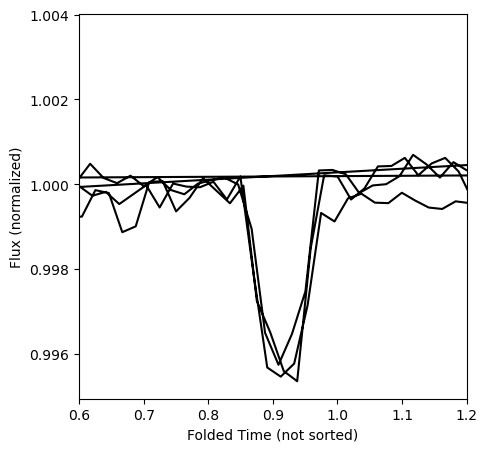

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(final_transit_times, final_transit_fluxes, color="k")
ax.set_xlabel("Folded Time (not sorted)")
ax.set_ylabel("Flux (normalized)")
ax.set_xlim(0.6, 1.2)

Text(0, 0.5, 'Folded Time')

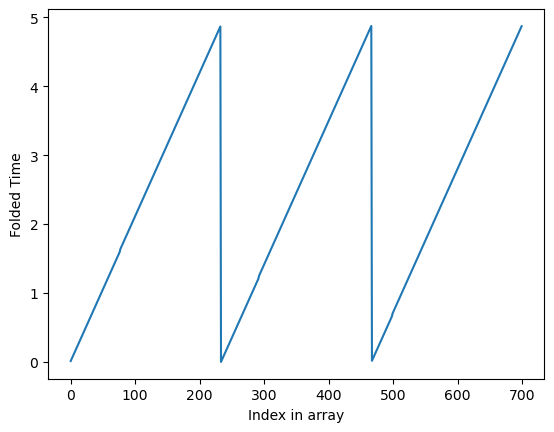

In [34]:
fig, ax = plt.subplots()
ax.plot(final_transit_times)
ax.set_xlabel("Index in array")
ax.set_ylabel("Folded Time")

Text(0, 0.5, 'Folded Time (sorted)')

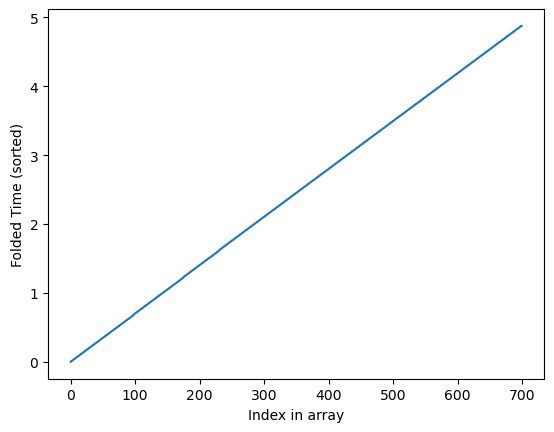

In [35]:
final_transit_sorted = final_transit[final_transit[:, 0].argsort()]
fig, ax = plt.subplots()
ax.plot(final_transit_sorted[:, 0])
ax.set_xlabel("Index in array")
ax.set_ylabel("Folded Time (sorted)")

(0.6, 1.2)

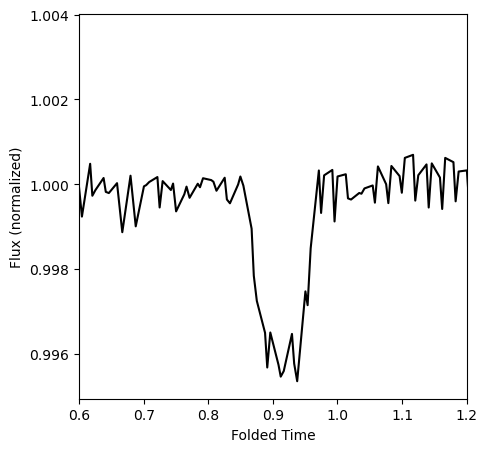

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(final_transit_sorted[:, 0], final_transit_sorted[:, 1], color="k")
ax.set_xlabel("Folded Time")
ax.set_ylabel("Flux (normalized)")
ax.set_xlim(0.6, 1.2)

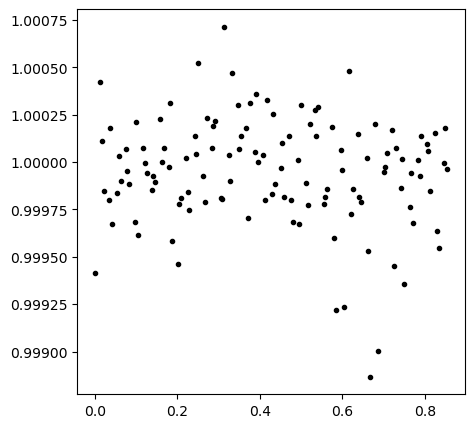

In [37]:
beginning_elements = final_transit_sorted[:123, :]
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(beginning_elements[:, 0], beginning_elements[:, 1], ".", color="k")

In [38]:
std = np.std(beginning_elements[:, 1])
std

np.float64(0.00028693376279735226)

In [39]:
# Depth / std
0.005 / std

np.float64(17.425624476026766)